# Calculating Realized Volatility

Looking to:
- Get the market data for each symbol
- Calculate the realized vol
    - Any time range (20 day, 30 day, 180 day, etc...)
- Visualize the realized volatility versus the underlier

We will:
- [Import Modules](#Import-Modules)
- [Get Market Data](#Get-Market-Data)
- [Get Realized Volatility](#Calculate-Realized-Volatility)
- [Visualize](#Visualize-Realized-Vol-Versus-Underlier)

### Import Modules


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import pandas_datareader.data as web
from datetime import datetime
from sklearn import preprocessing
now = datetime.now()

### Get Market Data

Create a function to automatically pull simple market data from Yahoo Finance

In [2]:
def get_data(symbol, start_date, end_date):
    scaler1 = preprocessing.MinMaxScaler() #better than StandardScaler() for stock data
    
    if symbol == "SPX" or symbol == "spx":
        spx = web.DataReader("^SPX", "stooq", start = start_date, end = end_date)
        spx = spx[::-1] #do this because the data comes in reverse order from Stooq
        spx['scaled'] = scaler1.fit_transform(spx['Close'].values.reshape(-1,1)) #scale data so fits on chart
        return spx
    
    elif symbol == "VIX" or symbol == "vix":
        vix = web.DataReader("^vix", start = start_date, end = end_date, data_source = 'yahoo')
        vix['scaled'] = vix['Adj Close'] / 100 #do this so on same scale as calculated vol
        return vix
    
    else:
        dataset = web.DataReader(symbol, start = start_date, end = end_date, data_source = 'yahoo')
        dataset['scaled'] = scaler1.fit_transform(dataset['Adj Close'].values.reshape(-1,1))
        return dataset
        

In [3]:
start = datetime(2015, 1, 1)
end = now

In [4]:
vix = get_data("vix", start, end)

In [5]:
vix

,High,Low,Open,Close,Volume,Adj Close,scaled
Date,,,,,,,
2014-12-31,19.910000,15.860000,15.910000,19.200001,0,19.200001,0.1920
2015-01-02,20.139999,17.049999,17.760000,17.790001,0,17.790001,0.1779
2015-01-05,21.290001,19.190001,19.190001,19.920000,0,19.920000,0.1992
2015-01-06,22.900000,19.520000,20.330000,21.120001,0,21.120001,0.2112
2015-01-07,20.719999,19.040001,20.150000,19.309999,0,19.309999,0.1931
...,...,...,...,...,...,...,...
2021-04-13,17.860001,16.430000,16.990000,16.650000,0,16.650000,0.1665
2021-04-14,17.690001,15.380000,16.709999,16.990000,0,16.990000,0.1699
2021-04-15,16.920000,15.940000,16.780001,16.570000,0,16.570000,0.1657


In [6]:
spx = get_data("spx", start, end)

In [7]:
spx

,Open,High,Low,Close,Volume,scaled
Date,,,,,,
2015-01-02,2058.90,2072.36,2046.04,2058.20,1504833333,0.097233
2015-01-05,2054.44,2054.44,2017.34,2020.58,2110622222,0.081268
2015-01-06,2022.15,2030.25,1992.44,2002.61,2477838889,0.073642
2015-01-07,2005.55,2029.61,2005.55,2025.90,2114155556,0.083526
2015-01-08,2030.61,2064.08,2030.61,2062.14,2185561111,0.098906
...,...,...,...,...,...,...
2021-04-13,4130.10,4148.00,4124.43,4141.59,2060718961,0.981378
2021-04-14,4141.58,4151.69,4120.87,4124.66,2092018943,0.974194
2021-04-15,4139.76,4173.49,4139.76,4170.42,2130933628,0.993613


In [8]:
aapl = get_data("aapl", start, end)

In [9]:
aapl

,High,Low,Open,Close,Volume,Adj Close,scaled
Date,,,,,,,
2014-12-31,28.282499,27.552500,28.205000,27.594999,165613600.0,25.100164,0.032556
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401,0.030596
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013,0.024847
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294,0.024865
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111,0.027647
...,...,...,...,...,...,...,...
2021-04-13,134.660004,131.929993,132.440002,134.429993,91266500.0,134.429993,0.930086
2021-04-14,135.000000,131.660004,134.940002,132.029999,87222800.0,132.029999,0.910383
2021-04-15,135.000000,133.639999,133.820007,134.500000,89347100.0,134.500000,0.930660


In [10]:
spy = get_data("spy", start, end)

In [11]:
spy

,High,Low,Open,Close,Volume,Adj Close,scaled
Date,,,,,,,
2014-12-31,208.190002,205.389999,207.990005,205.539993,130333800.0,182.247574,0.066583
2015-01-02,206.880005,204.179993,206.380005,205.429993,121465900.0,182.149979,0.066196
2015-01-05,204.369995,201.350006,204.169998,201.720001,169632600.0,178.860443,0.053130
2015-01-06,202.720001,198.860001,202.089996,199.820007,209151400.0,177.175781,0.046439
2015-01-07,202.720001,200.880005,201.419998,202.309998,125346700.0,179.383591,0.055208
...,...,...,...,...,...,...,...
2021-04-13,413.529999,411.119995,411.529999,412.859985,56551000.0,412.859985,0.982524
2021-04-14,413.959991,410.869995,412.829987,411.450012,61659900.0,411.450012,0.976924
2021-04-15,416.160004,413.690002,413.739990,415.869995,60229800.0,415.869995,0.994479


### Calculate Realized Volatility

Create a function to automatically return volatility over whatever time-period we choose

*Note that one-month vol is typically 21 (due to there being ~21 trading-days per month)*

In [12]:
def get_realized_vol(dataset, time):
    dataset['returns'] = np.log(dataset["Adj Close"]/dataset["Adj Close"].shift(1))
    dataset.fillna(0, inplace = True)
    #window/time tells us how many days out vol you want. ~21 = 1 month out vol (~21 trading days in a month)
    #we do this so we can match up with the vix which is the 30 day out (~21 trading day) calculated vol
    volatility = dataset.returns.rolling(window=time).std(ddof=0)*np.sqrt(252)
    return volatility
    
def get_realized_spx_vol(dataset, time):
    dataset['returns'] = np.log(dataset["Close"]/dataset["Close"].shift(1))
    dataset.fillna(0, inplace = True)
    spx_volatility = dataset.returns.rolling(window=time).std(ddof=0)*np.sqrt(252)
    return spx_volatility

In [13]:
aapl_vol = get_realized_vol(aapl, 21)
spx_vol = get_realized_spx_vol(spx, 21)
spy_vol = get_realized_vol(spy, 21)

In [14]:
aapl_vol

Date
2014-12-31         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2021-04-13    0.257943
2021-04-14    0.259746
2021-04-15    0.263107
2021-04-16    0.261689
2021-04-19    0.224351
Name: returns, Length: 1585, dtype: float64

In [15]:
spx_vol

Date
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
2015-01-08         NaN
                ...   
2021-04-13    0.112519
2021-04-14    0.113525
2021-04-15    0.116935
2021-04-16    0.116994
2021-04-19    0.103712
Name: returns, Length: 1584, dtype: float64

In [16]:
spy_vol

Date
2014-12-31         NaN
2015-01-02         NaN
2015-01-05         NaN
2015-01-06         NaN
2015-01-07         NaN
                ...   
2021-04-13    0.110344
2021-04-14    0.111246
2021-04-15    0.114420
2021-04-16    0.114414
2021-04-19    0.100832
Name: returns, Length: 1585, dtype: float64

### Visualize Realized Vol Versus Underlier

Now we can view our realized vol, our underlier movement, and the VIX as reference for overall market volatility sentiment.

In [17]:
def show_vol(get_data_info, realized_vol, vix, start_date, end_date):
    fig = plt.figure(figsize = (18,8))
    plt.plot(vix.scaled[start_date : end_date])
    plt.plot(realized_vol[start_date : end_date])
    plt.plot(get_data_info.scaled[start_date : end_date])
    plt.legend(["VIX", "Realized Vol", "Underlier (Scaled)"])
    plt.xlabel("Date")
    plt.ylabel("Volatility")

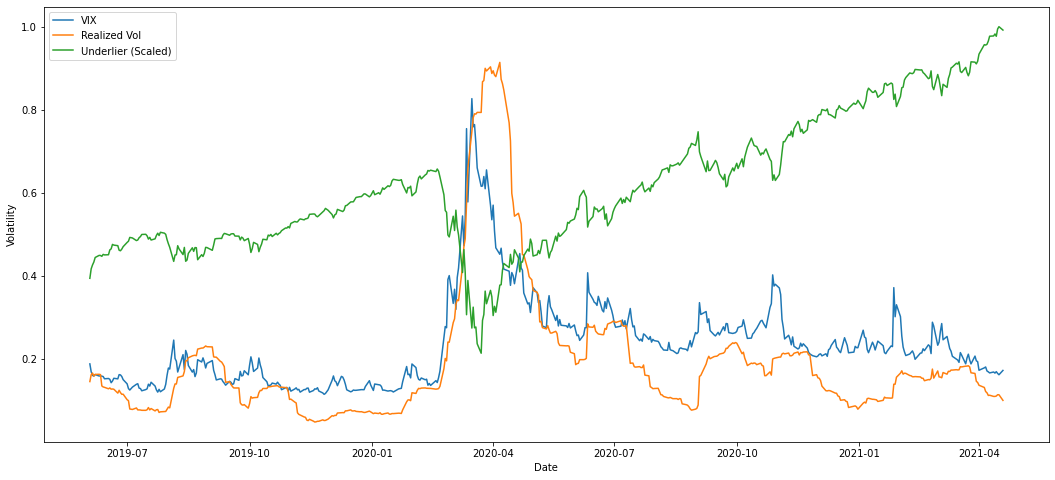

In [18]:
show_vol(spy, spy_vol, vix, '2019-06-01', end)

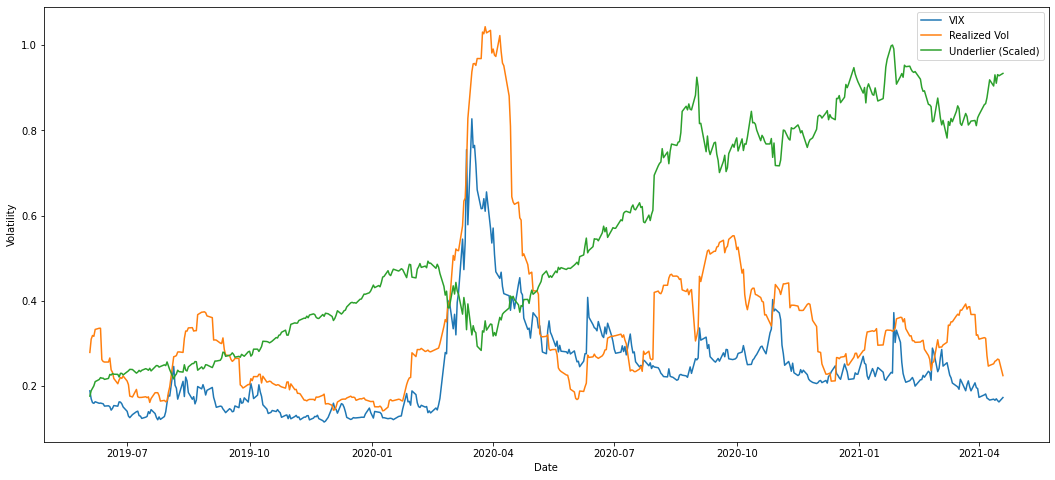

In [19]:
show_vol(aapl, aapl_vol, vix, '2019-06-01', end)

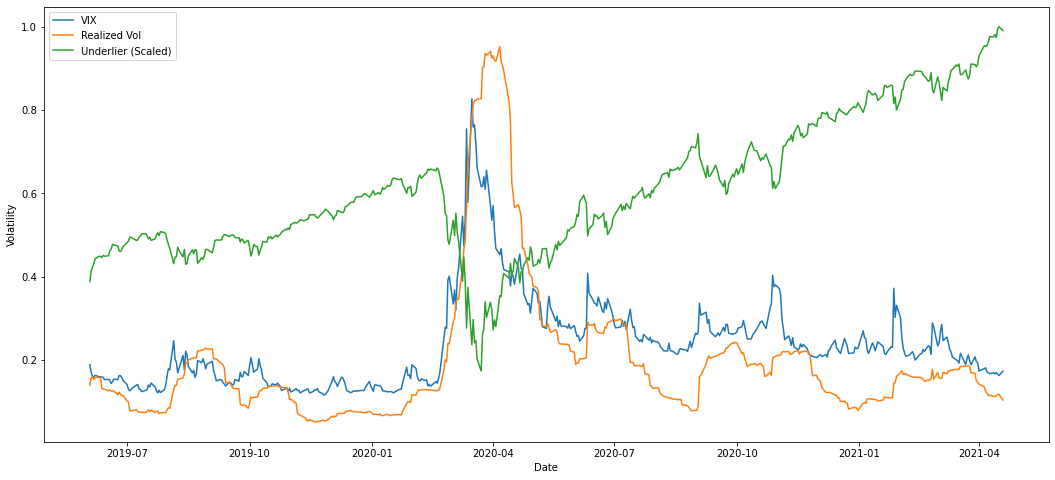

In [20]:
show_vol(spx, spx_vol, vix, '2019-06-01', end)